<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Machine%20Learning/08_association_rules/08_apriori_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### UCZENIE NIENADZOROWANE /  UNSUPERVISED LEARNING

# Association rules - apriori algorithm

A basic library for machine learning in Python
To install the scikit-learn library, use the command below:
```
!pip install scikit-learn
```
To update to the latest version of the scikit-learn library, use the command below:
```
!pip install --upgrade scikit-learn
```

### Contents:
1. [Import libraries](#0)
2. [Data generation ](#1)
3. [Data preaparing](#2)
4. [Transaction encoding](#3)
5. [Apriori algoritm](#4)




### <a name='0'></a> Import libraries

In [47]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
pd.options.mode.chained_assignment = None
np.random.seed(0)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### <a name='1'></a> Data generation

In [48]:
# Generate a large sample dataset
num_transactions = 10
num_items = 500

data = {
    'Transaction ID': list(range(1, num_transactions + 1)),
    'Items': [np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'), np.random.randint(1, 6)) for _ in range(num_transactions)]
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### <a name='2'></a> Data preaparing

In [49]:
# Convert the data dictionary into a DataFrame
df = pd.DataFrame(data)

# Show Dataset
df.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction ID,Items
0,1,"[P, V, A, D, D]"
1,2,"[T, V]"
2,3,"[E, X, G]"
3,4,[Y]
4,5,"[B, G, H, X, O]"
5,6,[R]
6,7,"[N, I]"
7,8,"[U, T]"
8,9,[T]
9,10,[S]


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction ID  10 non-null     int64 
 1   Items           10 non-null     object
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
#product distribuation
df['Items'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[P, V, A, D, D]    1
[T, V]             1
[E, X, G]          1
[Y]                1
[B, G, H, X, O]    1
[R]                1
[N, I]             1
[U, T]             1
[T]                1
[S]                1
Name: Items, dtype: int64

### <a name='4'></a> Transaction encoding

In [52]:
# Apply one-hot encoding to the dataset
one_hot_encoded = df['Items'].str.join('|').str.get_dummies()
one_hot_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,A,B,D,E,G,H,I,N,O,P,R,S,T,U,V,X,Y
0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### <a name='5'></a> Apriori algorithm

In [53]:
# Generate frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(one_hot_encoded, min_support=0.1, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
12,0.3,(T)
30,0.2,"(X, G)"
15,0.2,(X)
4,0.2,(G)
14,0.2,(V)
41,0.1,"(H, B, G)"
44,0.1,"(H, B, O)"
43,0.1,"(X, B, G)"
42,0.1,"(B, O, G)"
40,0.1,"(A, V, P)"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


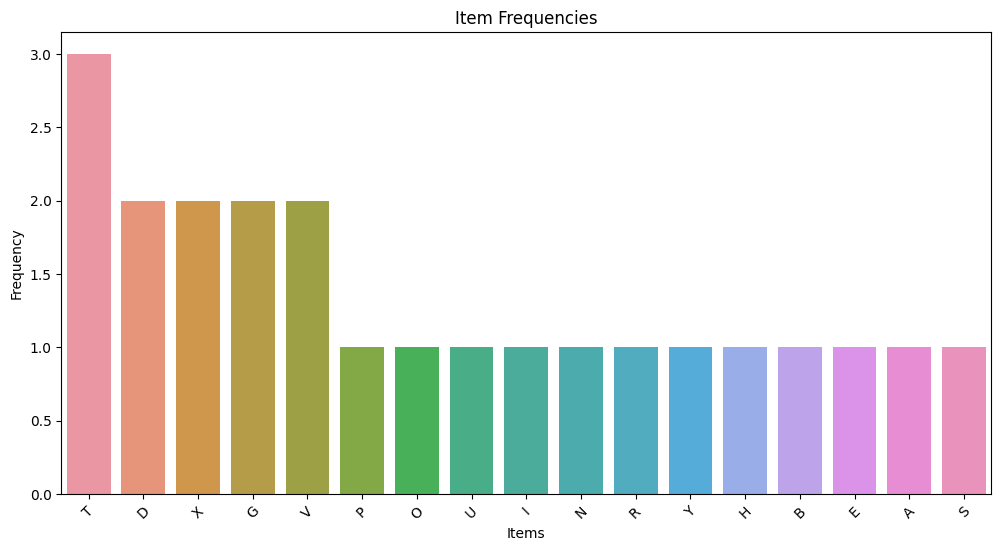

In [54]:
# Generate a bar chart of the item frequencies
item_counts = df['Items'].explode().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=item_counts.index, y=item_counts.values)
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Item Frequencies')
plt.xticks(rotation=45)
plt.show()

In [55]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1)
rules = rules.iloc[:, [0, 1, 4, 5, 6]]
rules = rules.sort_values(by='lift', ascending=False)
rules.head(15)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
98,(H),"(B, O, G)",0.1,1.0,10.0
128,"(H, O)","(X, B)",0.1,1.0,10.0
119,"(B, G)","(X, O)",0.1,1.0,10.0
120,"(O, G)","(X, B)",0.1,1.0,10.0
121,(B),"(X, O, G)",0.1,1.0,10.0
122,(O),"(X, B, G)",0.1,1.0,10.0
124,"(H, B, X)",(O),0.1,1.0,10.0
125,"(H, O, X)",(B),0.1,1.0,10.0
126,"(X, B, O)",(H),0.1,1.0,10.0
127,"(H, B)","(X, O)",0.1,1.0,10.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


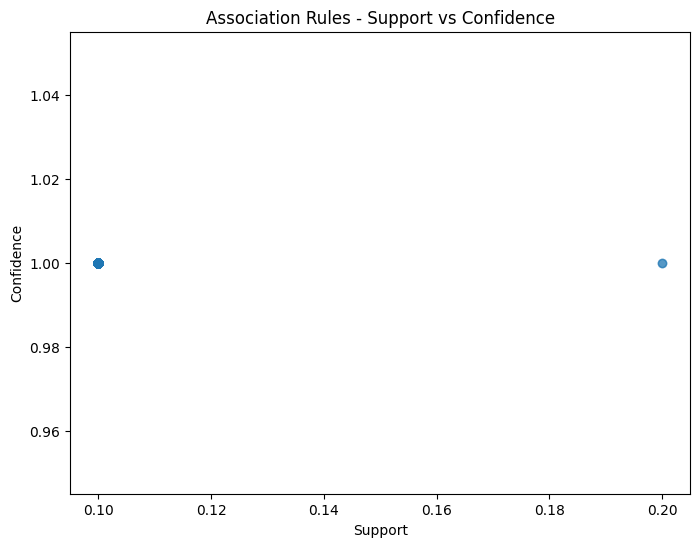

In [56]:
# Generate a scatter plot of support and confidence for association rules
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules - Support vs Confidence')
plt.show()